In [1]:
#Implement  Clustering an African Hairstyle Dataset Using PCA and K-Means
#Reference: Classification and Prediction of Diabetes Disease using Decision Tree Method, IT&AS 2021: Symposium on Information Technologies & Applied Sciences, March, 5, 2021, Bratislava, Slovakia
#Abstract: This paper presents an approach that uses K-Means clustering to classify images of African women's hairstyles. PCA is employed for dimensionality reduction before clustering.
#Author: Amay A. Kamulkar
#Relese: 0.1 Basic implementation
#referance: https://arxiv.org/abs/2306.06061

 Import Libraries and Load the Dataset

In [2]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Load the dataset
# Make sure 'winequality-red.csv' is uploaded to your working directory or Colab session
df = pd.read_csv('winequality-red.csv')

#Preview the dataset
print(df.head())
print(f"\nDataset shape: {df.shape}")


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

Data Preprocessing (Feature Selection & Scaling)

In [3]:
#Separate features and target
X = df.drop('quality', axis=1)  # We do unsupervised learning, so 'quality' is not used

#Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Shape of scaled data: {X_scaled.shape}")


Shape of scaled data: (1599, 11)


 Apply PCA for Dimensionality Reduction

In [4]:
#Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reducing to 2 components for easy visualization
X_pca = pca.fit_transform(X_scaled)

print(f"Shape of PCA-reduced data: {X_pca.shape}")


Shape of PCA-reduced data: (1599, 2)


Elbow Method to Find Optimal Number of Clusters

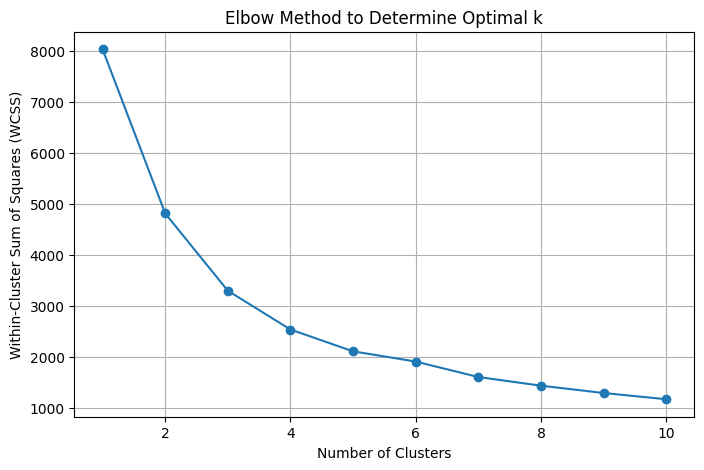

In [5]:
#Elbow Method to determine optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()


Apply K-Means Clustering and Visualize Results

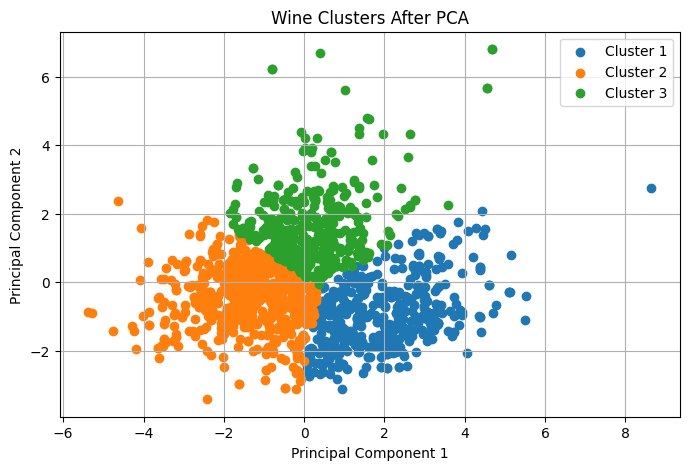

In [6]:
#Apply KMeans clustering with chosen k (e.g., k = 3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)

# 🖼️ Step 8: Visualize clusters
plt.figure(figsize=(8, 5))
for i in range(k):
    plt.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1], label=f'Cluster {i+1}')
plt.title('Wine Clusters After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


Evaluate with Silhouette Score

In [ ]:
#Evaluate clustering with Silhouette Score
score = silhouette_score(X_pca, y_kmeans)
print(f"Silhouette Score for k = {k}: {score:.4f}")
# 📏 Step 9: Evaluate clustering with Silhouette Score
score = silhouette_score(X_pca, y_kmeans)
print(f"Silhouette Score for k = {k}: {score:.4f}")
